# CNN- Architecture using MNIST Dataset

## **1. Objective :**

                        To build a Different type of CNN Architecture.

## **2. Dataset :**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# References 
# https://keras.io/datasets/

from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# mnist dataset for train and test

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# Shape of the data 

print("training features shape")
print("="*100)
print(x_train.shape)
print('training label shape')
print("="*100)
print(y_train.shape)
print("testing features shape")
print("="*100)
print(x_test.shape)
print("testing label shape")
print("="*100)
print(y_test.shape)

training features shape
(60000, 28, 28)
training label shape
(60000,)
testing features shape
(10000, 28, 28)
testing label shape
(10000,)


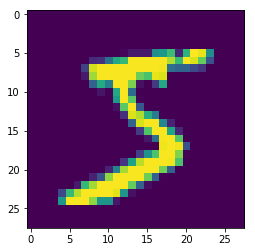

In [5]:
# Image data 

plt.close()
plt.imshow(x_train[0])

In [6]:
print("The Number is",y_train[0])

The Number is 5


In [0]:
# References
# https://keras.io/examples/mnist_cnn/

from keras import backend as K

In [0]:
img_rows=28
img_cols=28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# Labels in Mnist dataset
labels=set(y_train)

print("Mnist dataset labels")
print("="*100)
print(labels)

Mnist dataset labels
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [0]:
# Converting categorical Feature into one- hot encoding

# References
# https://keras.io/utils/

from keras.utils import np_utils

In [12]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

print("Before one-hot encoding")
print("="*100)
print(y_train.shape)
print("After one-hot encoding")
print("="*100)
print(Y_train.shape)

Before one-hot encoding
(60000,)
After one-hot encoding
(60000, 10)


## **3. Data Normalization :**

  In this Mnist Image dataset only contains pixels values. The pixel range is 0 to 255. So we apply the Data Normalization.
                                                       
                         

Data Normalization= $(X - X_a)/(X_b - X_a)$ 
 Where 
 $ X_a$=minimum value of the data 
 $X_b$=Maximum value of the data

In [0]:
X_train = x_train/255
X_test = x_test/255

## **4. CNN Architectures:**

### **4.1.  Three ConvNet Layers  followed by MLP :** 

In [0]:
# References
# https://keras.io/layers/

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization,Flatten
from keras.initializers import glorot_normal

In [0]:
# https://github.com/h5py/h5py/issues/961

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 4.1.1 **Sequence Model :**

In [0]:
# References
# https://stackoverflow.com/questions/45013060/how-to-do-zero-padding-in-keras-conv-layer

# Model Creation

model = Sequential()

# ConvNet layer 1

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(img_rows,img_cols,1),kernel_initializer="glorot_normal"))


# MaxPooling layer 1

model.add(MaxPooling2D(pool_size=(2,2)))

# ConvNet layer 2

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",kernel_initializer="glorot_normal"))

# MaxPooling layer 2

model.add(MaxPooling2D(pool_size=(2,2)))

# ConvNet layer 3

model.add(Conv2D(96,kernel_size=(3,3),activation="relu",kernel_initializer="glorot_normal"))

# MaxPooling layer 3

model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer

model.add(Flatten())

# Dense Layer 

model.add(Dense(128,activation="relu",kernel_initializer="glorot_normal"))

# Output layer

model.add(Dense(10,activation="softmax",kernel_initializer="glorot_normal"))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 96)          55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 96)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
__________

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.1.2 **Model Training:**

In [0]:
# model training

History=model.fit(X_train,Y_train,batch_size=200,epochs=10,verbose=1,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.4889 - acc: 0.8511 - val_loss: 0.1677 - val_acc: 0.9482
Epoch 2/10
48000/48000 [==============================] - 57s 1ms/step - loss: 0.1161 - acc: 0.9643 - val_loss: 0.0866 - val_acc: 0.9743
Epoch 3/10
48000/48000 [==============================] - 56s 1ms/step - loss: 0.0831 - acc: 0.9744 - val_loss: 0.0798 - val_acc: 0.9775
Epoch 4/10
48000/48000 [==============================] - 57s 1ms/step - loss: 0.0662 - acc: 0.9802 - val_loss: 0.0651 - val_acc: 0.9800
Epoch 5/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0562 - acc: 0.9829 - val_loss: 0.0657 - val_acc: 0.9801
Epoch 6/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0498 - acc: 0.9845 - val_loss: 0.0626 - val_acc: 0.9829
Epoch 7/10
48000/48000 [==============================] - 56s 1ms/step - loss: 0

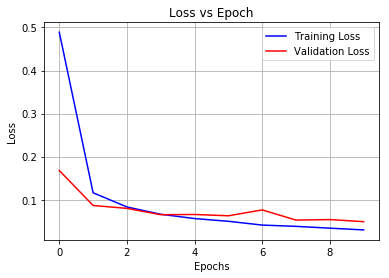

In [0]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

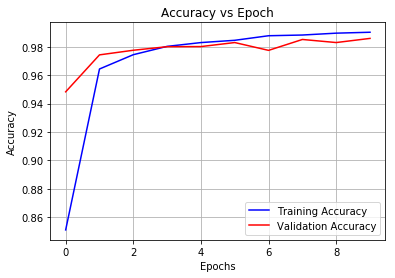

In [0]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'normal', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'max_pooling2d_1', 'trainable': True, 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}
{'name': 'conv2d_2', 'trainable': True, 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name':

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[2].get_weights()[0]
layer3_weights = model.layers[4].get_weights()[0]
layer4_weights = model.layers[7].get_weights()[0]
output_weights = model.layers[8].get_weights()[0]

print(" Conv Layer One Weight Matrix Shape")
print("="*125)
print(layer1_weights.shape)
print(" Conv Layer Two Weight Matrix Shape")
print("="*125)
print(layer2_weights.shape)
print(" Conv Layer Three Weight Matrix Shape")
print("="*125)
print(layer3_weights.shape)
print(" Dense Layer One Weight Matrix Shape")
print("="*125)
print(layer4_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*125)
print(output_weights.shape)

 Conv Layer One Weight Matrix Shape
(3, 3, 1, 32)
 Conv Layer Two Weight Matrix Shape
(3, 3, 32, 64)
 Conv Layer Three Weight Matrix Shape
(3, 3, 64, 96)
 Dense Layer One Weight Matrix Shape
(96, 128)
 Output Layer Weight Matrix Shape
(128, 10)


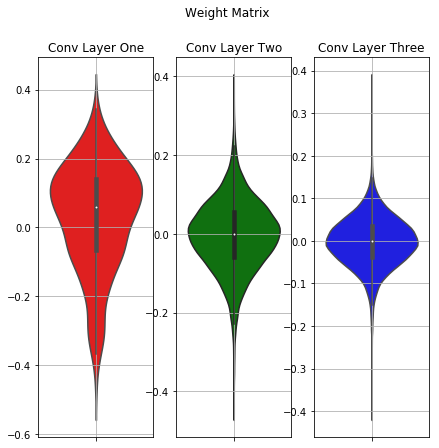

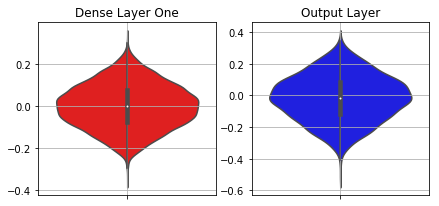

In [0]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Conv Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("Conv Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Conv Layer Three")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

fig = plt.figure(2,figsize=(7,7))

plt.subplot(2,2,1)
plt.title("Dense Layer One")
sns.violinplot(y=layer4_weights,color='r')
plt.grid()

plt.subplot(2,2,2)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.1.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [0]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.04682051499633817
 Evaluate Accuracy
0.9863


#### 4.1.4 **Model Predict:**

In [0]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[500].reshape(1,28,28,1)
test_data.shape

(1, 28, 28, 1)

In [0]:
pred_label = model.predict(test_data)

In [0]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[500].argmax())
print("The Predicted Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
3
The Predicted Label of the predicted data
3


#### 4.1.5 **Observation:**

In [0]:
from prettytable import PrettyTable

In [0]:

a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier/Glorot","Adam","Nil",200,10])
a.field_names = ["Conv Layer","Kernel Size","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([3,"3x3",0.0298,0.0490 ,0.0468,0.9902,0.9858,0.9863])
print(b)
print(a)

+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
| Xavier/Glorot  |    Adam   |     Nil      |    200     |   10   |
+----------------+-----------+--------------+------------+--------+
+------------+-------------+------------+----------+-----------+-----------+---------+----------+
| Conv Layer | Kernel Size | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+------------+-------------+------------+----------+-----------+-----------+---------+----------+
|     3      |     3x3     |   0.0298   |  0.049   |   0.0468  |   0.9902  |  0.9858 |  0.9863  |
+------------+-------------+------------+----------+-----------+-----------+---------+----------+


### **4.2.  Five ConvNet Layers  followed by MLP :** 

#### 4.2.1 **Sequence Model :**

In [0]:
# References
# https://stackoverflow.com/questions/45013060/how-to-do-zero-padding-in-keras-conv-layer

# Model Creation

model = Sequential()

# ConvNet layer 1

model.add(Conv2D(32,kernel_size=(5,5),activation="relu",input_shape=(img_rows,img_cols,1),kernel_initializer="glorot_normal"))


# MaxPooling layer 1

model.add(MaxPooling2D(pool_size=(2,2)))

# ConvNet layer 2

model.add(Conv2D(56,kernel_size=(5,5),activation="relu",kernel_initializer="glorot_normal"))

# MaxPooling layer 2

model.add(MaxPooling2D(pool_size=(2,2)))

# ConvNet layer 3

model.add(Conv2D(68,kernel_size=(5,5),activation="relu",padding="same",strides=1,kernel_initializer="glorot_normal"))

# MaxPooling layer 3

model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=1))

# ConvNet layer 4

model.add(Conv2D(80,kernel_size=(5,5),activation="relu",padding="same",strides=1,kernel_initializer="glorot_normal"))

# MaxPooling layer 4

model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=1))

# ConvNet layer 5

model.add(Conv2D(92,kernel_size=(5,5),activation="relu",padding="same",strides=1,kernel_initializer="glorot_normal"))

# MaxPooling layer 5

model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=1))

# Flatten Layer

model.add(Flatten())

# Dense Layer 

model.add(Dense(128,activation="relu",kernel_initializer="glorot_normal"))

# Output layer

model.add(Dense(10,activation="softmax",kernel_initializer="glorot_normal"))

In [0]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 56)          44856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 56)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 68)          95268     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 68)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 80)          136080    
__________

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.2.2 **Model Training:**

In [0]:
# model training

History=model.fit(X_train,Y_train,batch_size=200,epochs=10,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 158s 3ms/step - loss: 0.4791 - acc: 0.8354 - val_loss: 0.1306 - val_acc: 0.9592
Epoch 2/10
48000/48000 [==============================] - 153s 3ms/step - loss: 0.0781 - acc: 0.9763 - val_loss: 0.0806 - val_acc: 0.9752
Epoch 3/10
48000/48000 [==============================] - 156s 3ms/step - loss: 0.0470 - acc: 0.9856 - val_loss: 0.0531 - val_acc: 0.9834
Epoch 4/10
48000/48000 [==============================] - 157s 3ms/step - loss: 0.0372 - acc: 0.9881 - val_loss: 0.0506 - val_acc: 0.9856
Epoch 5/10
48000/48000 [==============================] - 155s 3ms/step - loss: 0.0266 - acc: 0.9920 - val_loss: 0.0470 - val_acc: 0.9873
Epoch 6/10
48000/48000 [==============================] - 156s 3ms/step - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0402 - val_acc: 0.9881
Epoch 7/10
48000/48000 [==============================] - 156s 3ms/step - loss: 0.0210 - acc: 0.9931 - val_loss: 0.0381 - 

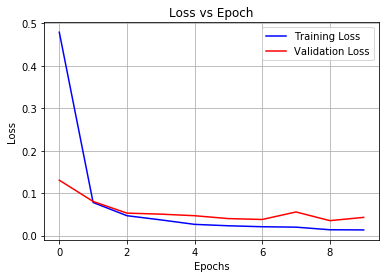

In [0]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

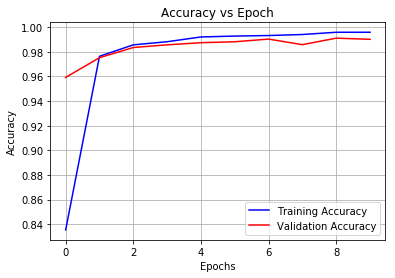

In [0]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'conv2d_17', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 32, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'normal', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'max_pooling2d_17', 'trainable': True, 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}
{'name': 'conv2d_18', 'trainable': True, 'filters': 56, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_nam

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[2].get_weights()[0]
layer3_weights = model.layers[4].get_weights()[0]
layer4_weights = model.layers[6].get_weights()[0]
layer5_weights = model.layers[8].get_weights()[0]
layer6_weights = model.layers[11].get_weights()[0]
output_weights = model.layers[12].get_weights()[0]

print(" Conv Layer One Weight Matrix Shape")
print("="*125)
print(layer1_weights.shape)
print(" Conv Layer Two Weight Matrix Shape")
print("="*125)
print(layer2_weights.shape)
print(" Conv Layer Three Weight Matrix Shape")
print("="*125)
print(layer3_weights.shape)
print(" Conv Layer Four Weight Matrix Shape")
print("="*125)
print(layer4_weights.shape)
print(" Conv Layer Five Weight Matrix Shape")
print("="*125)
print(layer5_weights.shape)
print(" Dense Layer One Weight Matrix Shape")
print("="*125)
print(layer6_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*125)
print(output_weights.shape)

 Conv Layer One Weight Matrix Shape
(5, 5, 1, 32)
 Conv Layer Two Weight Matrix Shape
(5, 5, 32, 56)
 Conv Layer Three Weight Matrix Shape
(5, 5, 56, 68)
 Conv Layer Four Weight Matrix Shape
(5, 5, 68, 80)
 Conv Layer Five Weight Matrix Shape
(5, 5, 80, 92)
 Dense Layer One Weight Matrix Shape
(1472, 128)
 Output Layer Weight Matrix Shape
(128, 10)


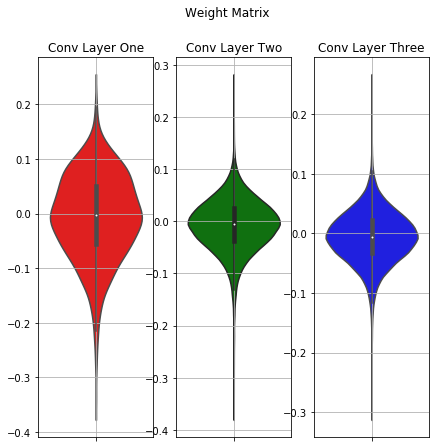

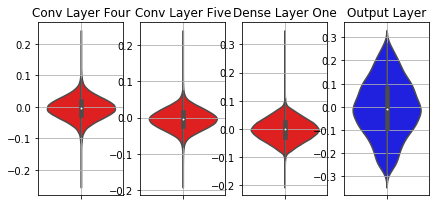

In [0]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Conv Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("Conv Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Conv Layer Three")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

fig = plt.figure(2,figsize=(7,7))

plt.subplot(2,4,1)
plt.title("Conv Layer Four")
sns.violinplot(y=layer4_weights,color='r')
plt.grid()

plt.subplot(2,4,2)
plt.title("Conv Layer Five")
sns.violinplot(y=layer5_weights,color='r')
plt.grid()

plt.subplot(2,4,3)
plt.title("Dense Layer One")
sns.violinplot(y=layer6_weights,color='r')
plt.grid()

plt.subplot(2,4,4)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.2.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [0]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.027854739522151065
 Evaluate Accuracy
0.9921


#### 4.2.4 **Model Predict:**

In [0]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[1500].reshape(1,28,28,1)
test_data.shape

(1, 28, 28, 1)

In [0]:
pred_label = model.predict(test_data)

In [0]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[1500].argmax())
print("The Predicted Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
7
The Predicted Label of the predicted data
7


#### 4.2.5 **Observation:**

In [0]:

a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier/Glorot","Adam","Nil",200,10])
a.field_names = ["Conv Layer","Kernel Size","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([5,"5x5",0.0135,0.0430 ,0.0278,0.9958,0.9901,0.9921])
print(b)
print(a)


+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
| Xavier/Glorot  |    Adam   |     Nil      |    200     |   10   |
+----------------+-----------+--------------+------------+--------+
+------------+-------------+------------+----------+-----------+-----------+---------+----------+
| Conv Layer | Kernel Size | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+------------+-------------+------------+----------+-----------+-----------+---------+----------+
|     5      |     5x5     |   0.0135   |  0.043   |   0.0278  |   0.9958  |  0.9901 |  0.9921  |
+------------+-------------+------------+----------+-----------+-----------+---------+----------+


### **4.3.  Seven ConvNet Layers  followed by MLP :** 

#### 4.3.1 **Sequence Model :**

In [0]:
# References
# https://stackoverflow.com/questions/45013060/how-to-do-zero-padding-in-keras-conv-layer

# Model Creation

model = Sequential()

# ConvNet layer 1

model.add(Conv2D(16,kernel_size=(2,2),activation="relu",input_shape=(img_rows,img_cols,1),kernel_initializer="glorot_normal"))

# MaxPooling layer 1

model.add(MaxPooling2D(pool_size=(2,2)))

# ConvNet layer 2

model.add(Conv2D(32,kernel_size=(2,2),activation="relu",kernel_initializer="glorot_normal"))

# MaxPooling layer 2

model.add(MaxPooling2D(pool_size=(2,2)))

# ConvNet layer 3

model.add(Conv2D(44,kernel_size=(2,2),activation="relu",padding="same",strides=1,kernel_initializer="glorot_normal"))

# MaxPooling layer 3

model.add(MaxPooling2D(pool_size=(2,2),padding='same',strides=1))

# ConvNet layer 4

model.add(Conv2D(56,kernel_size=(2,2),activation="relu",padding="same",strides=1,kernel_initializer="glorot_normal"))

# MaxPooling layer 4

model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=1))

# ConvNet layer 5

model.add(Conv2D(68,kernel_size=(2,2),activation="relu",padding="same",strides=1,kernel_initializer="glorot_normal"))

# MaxPooling layer 5

model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=1))

# ConvNet layer 6

model.add(Conv2D(80,kernel_size=(5,5),activation="relu",padding="same",strides=1,kernel_initializer="glorot_normal"))

# MaxPooling layer 6

model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=1))

# ConvNet layer 7

model.add(Conv2D(92,kernel_size=(5,5),activation="relu",padding="same",strides=1,kernel_initializer="glorot_normal"))

# MaxPooling layer 7

model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=1))

# Flatten Layer

model.add(Flatten())

# Dense Layer 

model.add(Dense(128,activation="relu",kernel_initializer="glorot_normal"))


# Output layer

model.add(Dense(10,activation="softmax",kernel_initializer="glorot_normal"))

In [0]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 12, 12, 32)        2080      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 6, 6, 44)          5676      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 6, 6, 44)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 6, 6, 56)          9912      
__________

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.3.2 **Model Training:**

In [0]:
# model training

History=model.fit(X_train,Y_train,batch_size=200,epochs=10,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 163s 3ms/step - loss: 0.6238 - acc: 0.7815 - val_loss: 0.1439 - val_acc: 0.9534
Epoch 2/10
48000/48000 [==============================] - 159s 3ms/step - loss: 0.1213 - acc: 0.9612 - val_loss: 0.0853 - val_acc: 0.9734
Epoch 3/10
48000/48000 [==============================] - 159s 3ms/step - loss: 0.0770 - acc: 0.9757 - val_loss: 0.0633 - val_acc: 0.9793
Epoch 4/10
48000/48000 [==============================] - 157s 3ms/step - loss: 0.0616 - acc: 0.9805 - val_loss: 0.0801 - val_acc: 0.9758
Epoch 5/10
48000/48000 [==============================] - 159s 3ms/step - loss: 0.0497 - acc: 0.9841 - val_loss: 0.0711 - val_acc: 0.9783
Epoch 6/10
48000/48000 [==============================] - 158s 3ms/step - loss: 0.0433 - acc: 0.9865 - val_loss: 0.0506 - val_acc: 0.9829
Epoch 7/10
48000/48000 [==============================] - 157s 3ms/step - loss: 0.0366 - acc: 0.9881 - val_loss: 0.0431 - 

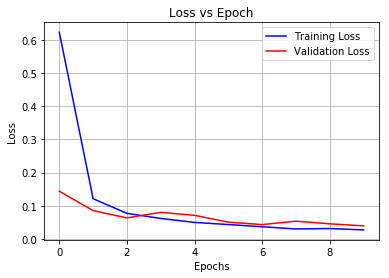

In [0]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

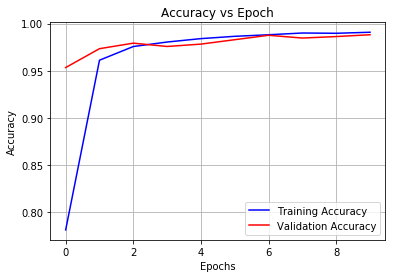

In [0]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'conv2d_68', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 16, 'kernel_size': (2, 2), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'normal', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'max_pooling2d_68', 'trainable': True, 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}
{'name': 'conv2d_69', 'trainable': True, 'filters': 32, 'kernel_size': (2, 2), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_nam

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[2].get_weights()[0]
layer3_weights = model.layers[4].get_weights()[0]
layer4_weights = model.layers[6].get_weights()[0]
layer5_weights = model.layers[8].get_weights()[0]
layer6_weights = model.layers[10].get_weights()[0]
layer7_weights = model.layers[12].get_weights()[0]
layer8_weights = model.layers[15].get_weights()[0]
output_weights = model.layers[16].get_weights()[0]

print(" Conv Layer One Weight Matrix Shape")
print("="*125)
print(layer1_weights.shape)
print(" Conv Layer Two Weight Matrix Shape")
print("="*125)
print(layer2_weights.shape)
print(" Conv Layer Three Weight Matrix Shape")
print("="*125)
print(layer3_weights.shape)
print(" Conv Layer Four Weight Matrix Shape")
print("="*125)
print(layer4_weights.shape)
print(" Conv Layer Five Weight Matrix Shape")
print("="*125)
print(layer5_weights.shape)
print(" Conv Layer Six Weight Matrix Shape")
print("="*125)
print(layer6_weights.shape)
print(" Conv Layer Seven Weight Matrix Shape")
print("="*125)
print(layer7_weights.shape)
print(" Dense Layer One Weight Matrix Shape")
print("="*125)
print(layer8_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*125)
print(output_weights.shape)

 Conv Layer One Weight Matrix Shape
(2, 2, 1, 16)
 Conv Layer Two Weight Matrix Shape
(2, 2, 16, 32)
 Conv Layer Three Weight Matrix Shape
(2, 2, 32, 44)
 Conv Layer Four Weight Matrix Shape
(2, 2, 44, 56)
 Conv Layer Five Weight Matrix Shape
(2, 2, 56, 68)
 Conv Layer Six Weight Matrix Shape
(5, 5, 68, 80)
 Conv Layer Seven Weight Matrix Shape
(5, 5, 80, 92)
 Dense Layer One Weight Matrix Shape
(3312, 128)
 Output Layer Weight Matrix Shape
(128, 10)


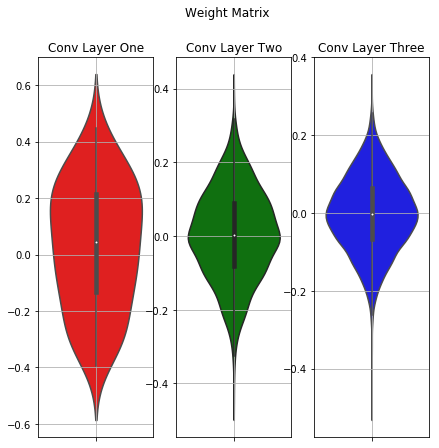

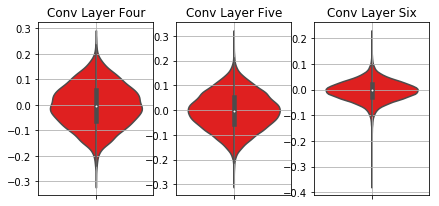

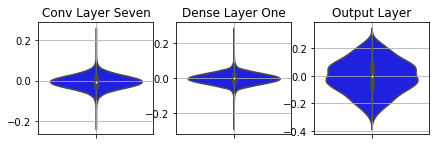

In [0]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Conv Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("Conv Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Conv Layer Three")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

fig = plt.figure(2,figsize=(7,7))

plt.subplot(2,3,1)
plt.title("Conv Layer Four")
sns.violinplot(y=layer4_weights,color='r')
plt.grid()

plt.subplot(2,3,2)
plt.title("Conv Layer Five")
sns.violinplot(y=layer5_weights,color='r')
plt.grid()

plt.subplot(2,3,3)
plt.title("Conv Layer Six")
sns.violinplot(y=layer6_weights,color='r')
plt.grid()

fig = plt.figure(3,figsize=(7,7))

plt.subplot(3,3,1)
plt.title("Conv Layer Seven")
sns.violinplot(y=layer7_weights,color='b')
plt.grid()

plt.subplot(3,3,2)
plt.title("Dense Layer One")
sns.violinplot(y=layer8_weights,color='b')
plt.grid()

plt.subplot(3,3,3)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.3.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [0]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.03270135420578881
 Evaluate Accuracy
0.9893


#### 4.3.4 **Model Predict:**

In [0]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[2500].reshape(1,28,28,1)
test_data.shape

(1, 28, 28, 1)

In [0]:
pred_label = model.predict(test_data)

In [0]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[2500].argmax())
print("The Predicted Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
2
The Predicted Label of the predicted data
2


#### 4.3.5 **Observation:**

In [0]:

a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier/Glorot","Adam","Nil",200,10])
a.field_names = ["Conv Layer","Kernel Size","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([7,"2x2",0.0270,0.0394 ,0.0327,0.9908,0.9882,0.9893])
print(b)
print(a)

+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
| Xavier/Glorot  |    Adam   |     Nil      |    200     |   10   |
+----------------+-----------+--------------+------------+--------+
+------------+-------------+------------+----------+-----------+-----------+---------+----------+
| Conv Layer | Kernel Size | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+------------+-------------+------------+----------+-----------+-----------+---------+----------+
|     7      |     2x2     |   0.027    |  0.0394  |   0.0327  |   0.9908  |  0.9882 |  0.9893  |
+------------+-------------+------------+----------+-----------+-----------+---------+----------+


### **4.4.  Three ConvNet Layers  followed by MLP :** 

#### 4.4.1 **Sequential Model:**

In [20]:
# References
# https://stackoverflow.com/questions/45013060/how-to-do-zero-padding-in-keras-conv-layer

# Model Creation

model = Sequential()

# ConvNet layer 1

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(img_rows,img_cols,1),kernel_initializer="glorot_normal"))

# ConvNet layer 2

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",kernel_initializer="glorot_normal"))

# ConvNet layer 3

model.add(Conv2D(96,kernel_size=(3,3),activation="relu",kernel_initializer="glorot_normal"))

# MaxPooling layer 2

model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer

model.add(Flatten())

# Dropout Layer 1

model.add(Dropout(0.5))

# Dense Layer 

model.add(Dense(128,activation="relu",kernel_initializer="glorot_normal"))

# Dropout Layer 2

model.add(Dropout(0.5))

# Output layer

model.add(Dense(10,activation="softmax",kernel_initializer="glorot_normal"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 96)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 11616)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11616)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1486976   
__________

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### 4.4.2 **Model Training:**

In [23]:
# model training

History=model.fit(X_train,Y_train,batch_size=200,epochs=10,verbose=1,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 405s 8ms/step - loss: 0.2775 - acc: 0.9131 - val_loss: 0.0634 - val_acc: 0.9821
Epoch 2/10
48000/48000 [==============================] - 398s 8ms/step - loss: 0.0956 - acc: 0.9716 - val_loss: 0.0478 - val_acc: 0.9853
Epoch 3/10
48000/48000 [==============================] - 412s 9ms/step - loss: 0.0710 - acc: 0.9787 - val_loss: 0.0399 - val_acc: 0.9893
Epoch 4/10
48000/48000 [==============================] - 410s 9ms/step - loss: 0.0591 - acc: 0.9823 - val_loss: 0.0368 - val_acc: 0.9899
Epoch 5/10
48000/48000 [==============================] - 417s 9ms/step - loss: 0.0510 - acc: 0.9840 - val_loss: 0.0361 - val_acc: 0.9894
Epoch 6/10
48000/48000 [==============================] - 409s 9ms/step - loss: 0.0454 - acc: 0.9858 - val_loss: 0.0358 - val_acc: 0.9900
Epoch 7/10
48000/48000 [==============================] - 406s 8ms/step - 

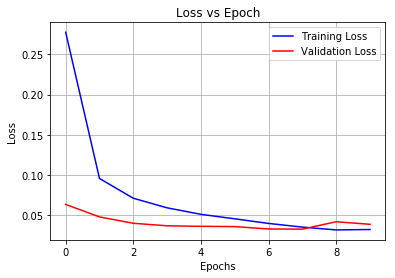

In [24]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

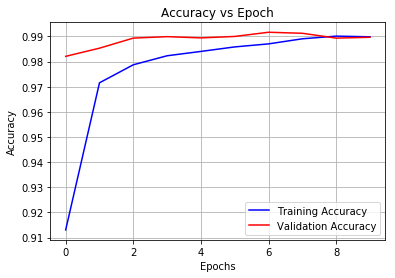

In [25]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [26]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'conv2d_7', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'normal', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'conv2d_8', 'trainable': True, 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'normal', 'seed': None}}, 'bias_initializer': {'class_name'

In [27]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[1].get_weights()[0]
layer3_weights = model.layers[2].get_weights()[0]
layer4_weights = model.layers[6].get_weights()[0]
output_weights = model.layers[8].get_weights()[0]

print(" Conv Layer One Weight Matrix Shape")
print("="*125)
print(layer1_weights.shape)
print(" Conv Layer Two Weight Matrix Shape")
print("="*125)
print(layer2_weights.shape)
print(" Conv Layer Three Weight Matrix Shape")
print("="*125)
print(layer3_weights.shape)
print(" Dense Layer One Weight Matrix Shape")
print("="*125)
print(layer4_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*125)
print(output_weights.shape)

 Conv Layer One Weight Matrix Shape
(3, 3, 1, 32)
 Conv Layer Two Weight Matrix Shape
(3, 3, 32, 64)
 Conv Layer Three Weight Matrix Shape
(3, 3, 64, 96)
 Dense Layer One Weight Matrix Shape
(11616, 128)
 Output Layer Weight Matrix Shape
(128, 10)


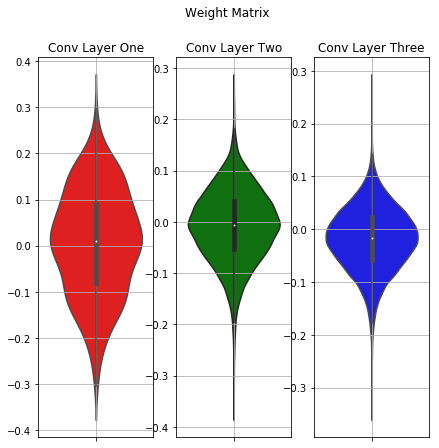

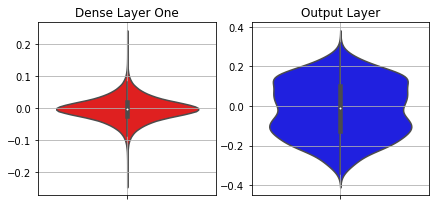

In [28]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Conv Layer One")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("Conv Layer Two")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Conv Layer Three")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

fig = plt.figure(2,figsize=(7,7))

plt.subplot(2,2,1)
plt.title("Dense Layer One")
sns.violinplot(y=layer4_weights,color='r')
plt.grid()

plt.subplot(2,2,2)
plt.title("Output Layer")
sns.violinplot(y=output_weights,color='b')
plt.grid()

 **Observation:**
                                          The weights are not too large and not too small. The weights are normally distributed.

#### 4.4.3 **Model Evaluation:**

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(X_test,Y_test,verbose=0)

In [30]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.03234234300716998
 Evaluate Accuracy
0.9901


#### 4.4.4 **Model Predict:**

In [31]:
# References
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://keras.io/models/model/#predict

test_data=X_test[500].reshape(1,28,28,1)
test_data.shape

(1, 28, 28, 1)

In [0]:
pred_label = model.predict(test_data)

In [33]:
print("The Actual Label of the predicted data")
print("="*100)
print(Y_test[500].argmax())
print("The Predicted Label of the predicted data")
print("="*100)
print(pred_label.argmax())

The Actual Label of the predicted data
3
The Predicted Label of the predicted data
3


#### 4.4.5 **Observation:**

In [0]:
from prettytable import PrettyTable

In [35]:

a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier/Glorot","Adam","Nil",200,10])
a.field_names = ["Conv Layer","Kernel Size","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([3,"3x3",0.0321,0.0386,0.0323,0.9899,0.9897,0.9901])
print(b)
print(a)


+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
| Xavier/Glorot  |    Adam   |     Nil      |    200     |   10   |
+----------------+-----------+--------------+------------+--------+
+------------+-------------+------------+----------+-----------+-----------+---------+----------+
| Conv Layer | Kernel Size | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+------------+-------------+------------+----------+-----------+-----------+---------+----------+
|     3      |     3x3     |   0.0321   |  0.0386  |   0.0323  |   0.9899  |  0.9897 |  0.9901  |
+------------+-------------+------------+----------+-----------+-----------+---------+----------+


## 5. Conclusion:

In [36]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Initialization","Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Xavier/Glorot","Adam","Nil",200,10])
a.field_names = ["Conv Layer","Kernel Size","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row(["3 with alternate maxpool","3x3",0.0298,0.0490 ,0.0468,0.9902,0.9858,0.9863])
a.add_row(["5 with alternate maxpool","5x5",0.0135,0.0430 ,0.0278,0.9958,0.9901,0.9921])
a.add_row(["7 with alternate maxpool","2x2",0.0270,0.0394 ,0.0327,0.9908,0.9882,0.9893])
a.add_row(["3 without alternate maxpool","3x3",0.0321,0.0386,0.0323,0.9899,0.9897,0.9901])
print("The common factors for all architecture")
print("="*100)
print(b)
print("Architecture loss and accuracy comparision")
print("="*100)
print(a)

The common factors for all architecture
+----------------+-----------+--------------+------------+--------+
| Initialization | Optimizer | Dropout rate | Batch Size | Epochs |
+----------------+-----------+--------------+------------+--------+
| Xavier/Glorot  |    Adam   |     Nil      |    200     |   10   |
+----------------+-----------+--------------+------------+--------+
Architecture loss and accuracy comparision
+-----------------------------+-------------+------------+----------+-----------+-----------+---------+----------+
|          Conv Layer         | Kernel Size | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+-----------------------------+-------------+------------+----------+-----------+-----------+---------+----------+
|   3 with alternate maxpool  |     3x3     |   0.0298   |  0.049   |   0.0468  |   0.9902  |  0.9858 |  0.9863  |
|   5 with alternate maxpool  |     5x5     |   0.0135   |  0.043   |   0.0278  |   0.9958  |  0.9901 |  0.9921  |
| 

**Data Preparation:**

    The Minist Data was gathered by using Keras library and it was splitted into Train and Test data.The train and Test data have (28,28) dimension. So the (28,28) has been converted into (28,28,1). And the 10 class labeled data was converted into categorical labeled data using One Hot Encoding.

**Data Normalization:**

    Before the data's are going into the model, the data's are Normalized using Data Normalization formula.

**Deep CNN:**

    The Different architectures (3 ConvNet layers with 3x3 filter size, 5 ConvNet layer with 5x5 filter size, 7 ConvNet layers with 2x2 filter size) has been  implemented.The Xavier Initialization was implemented for this assignment.

**Loss vs Epoch plot:**

    Loss(Train and Validation) vs Epoch graph has been plotted sucessfully for each of the Architecture.

**Weight Plot:**

    Weight (Weight matrix got After the Optimization) graph has been plotted sucessfully for each of the Architecture.